In [1]:
#05 회귀

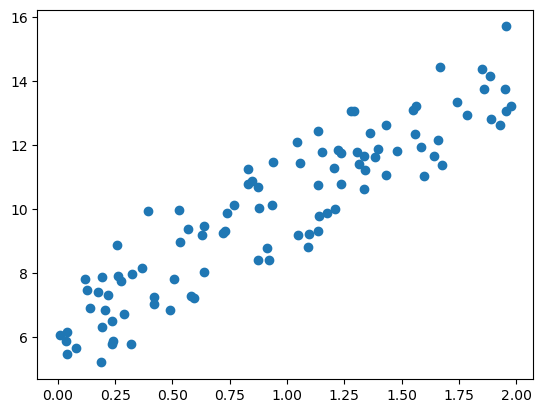

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# 0과 1사이에서 100,1 모양의 난수 배열을 만듬
X=2*np.random.rand(100,1)
# 여기는 가우시안 분포
y=6+4*X+np.random.randn(100,1)

plt.scatter(X,y)

In [3]:

def get_cost(y,y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred)/N)
    return cost

In [4]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N=len(y)
    w1_update=np.zeros_like(w1)
    w0_update=np.zeros_like(w0)
    y_pred=np.dot(X,w1.T)+w0
    diff=y-y_pred

    w0_factors=np.ones((N,1))

    w1_update=(-2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    return w1_update,w0_update

In [9]:
# iters주어진 횟수 만큼 반복적으로 가중치 업데이트
def gradient_descent_step(X,y,iters=10000):
    # w0와 w1 초기화
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))


    for ind in range(iters):
        w1_update,w0_update=get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update

    return w1,w0

In [10]:
def get_cost(y,y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred))/N
    return cost


w1,w0=gradient_descent_step(X,y,iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred=w1[0,0]*X+w0
print('Gredient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gredient Descent Total Cost:0.9935
